# Advanced Matplots

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

In [2]:
x = np.linspace(0, 5, 11)
y = x ** 2

## Logarithmic Scale
`ax.set_yscale("log")`

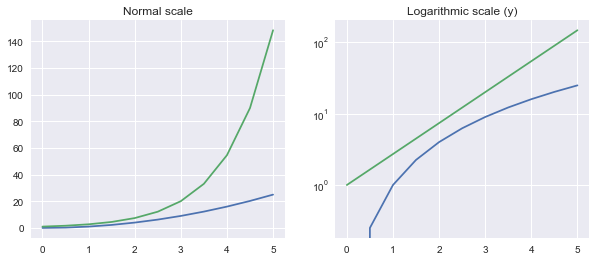

In [35]:
fig, axes = plt.subplots(1, 2, figsize=(10,4))
      
axes[0].plot(x, x**2, x, np.exp(x))
axes[0].set_title("Normal scale")

axes[1].plot(x, x**2, x, np.exp(x))
axes[1].set_yscale("log")
axes[1].set_title("Logarithmic scale (y)")
fig.savefig('images/01 log.png',dpi=200)

## Placing ticks and customizing them
__`ax.set_xticks()`, `ax.set_xticklabels()`__, `ax.get_xticklabels()`

__`ax.set_yticks()`, `ax.set_yticklabels()`__, `ax.get_yticklabels()`

`ax.yaxis.tick_left()`

`ax.xaxis.set_ticks_position('bottom')`

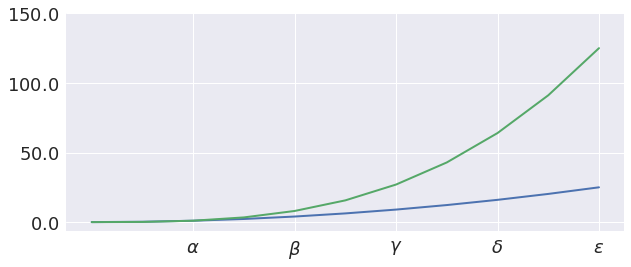

In [36]:
fig, ax = plt.subplots(figsize=(10, 4))

ax.plot(x, x**2, x, x**3, lw=2)

xticklabels=[r'$\alpha$', r'$\beta$', r'$\gamma$', r'$\delta$', r'$\epsilon$']
ax.set_xticks([1, 2, 3, 4, 5])
ax.set_xticklabels(xticklabels, fontsize=18)

yticks=[0, 50, 100, 150]
yticklabels=["$%.1f$" % y for y in yticks]
ax.set_yticks(yticks)
ax.set_yticklabels(yticklabels, fontsize=18); # use LaTeX formatted labels
fig.savefig('images/02 ticks.png',dpi=200)

## Scientific Notation

`formatter=matplotlib.ticker.ScalarFormatter(useMathText=True)`

`formatter.set_scientific(True)`, `formatter.set_powerlimits((-1,1))`

`ax.yaxis.set_major_formatter(formatter)`

In [37]:
from matplotlib import ticker

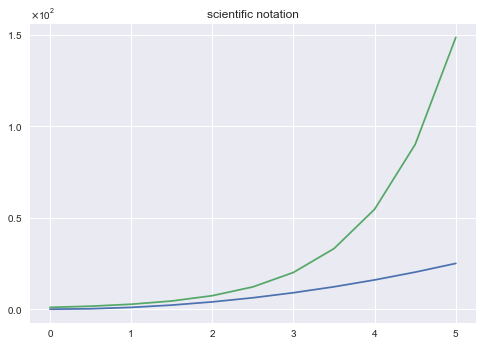

In [38]:
fig, ax = plt.subplots()
      
ax.plot(x, x**2, x, np.exp(x))
ax.set_title("scientific notation")

ax.set_yticks([0, 50, 100, 150])

formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 
formatter.set_powerlimits((-1,1)) 
ax.yaxis.set_major_formatter(formatter) 
fig.savefig('images/03 sci_notation.png',dpi=200)

## Grids
`ax.grid(color, alpha, ls, lw)`

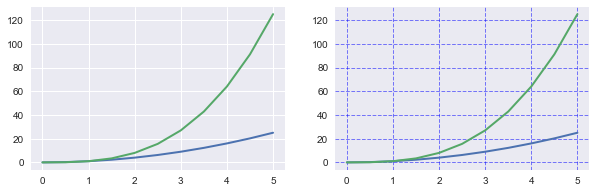

In [39]:
fig, axes = plt.subplots(1, 2, figsize=(10,3))

# default grid appearance
axes[0].plot(x, x**2, x, x**3, lw=2)
axes[0].grid(True)

# custom grid appearance
axes[1].plot(x, x**2, x, x**3, lw=2)
axes[1].grid(color='b', alpha=0.5, ls='dashed', lw=1)
fig.savefig('images/04 grid.png',dpi=200)

## Axis Spines
__`ax.spines['left'].set_color('')`__

__`ax.spines['top'].set_linewidth(2)`__

`ax.spines['bottom'].set_position(('data',0))`

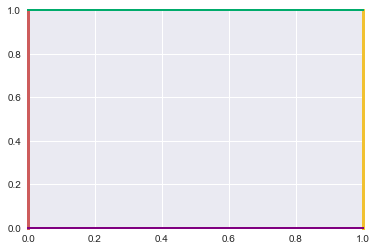

In [40]:
fig, ax = plt.subplots(figsize=(6,4))
ax.spines['top'].set_linewidth(2)
ax.spines['right'].set_linewidth(3)
ax.spines['left'].set_linewidth(3)
ax.spines['bottom'].set_linewidth(2)


ax.spines['bottom'].set_color('purple')
ax.spines['top'].set_color('#00ab6b')

ax.spines['left'].set_color('indianred')

ax.spines['right'].set_color('#f1c131')
ax.yaxis.tick_left()

fig.savefig('images/05 spines.png',dpi=200)

## Twin Axis
`ax2 = ax1.twinx()`



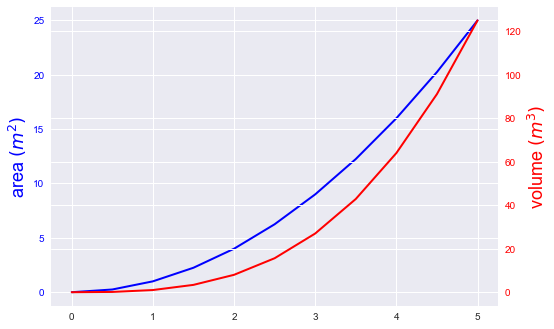

In [41]:
fig, ax1 = plt.subplots()

ax1.plot(x, x**2, lw=2, color="blue")
ax1.set_ylabel(r"area $(m^2)$", fontsize=18, color="blue")
for label in ax1.get_yticklabels():
    label.set_color("blue")
    
ax2 = ax1.twinx()
ax2.plot(x, x**3, lw=2, color="red")
ax2.set_ylabel(r"volume $(m^3)$", fontsize=18, color="red")
for label in ax2.get_yticklabels():
    label.set_color("red")
    
fig.savefig('images/06 twin.png',dpi=200)

### Axes where x and y is zero

`ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))`

`ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))`

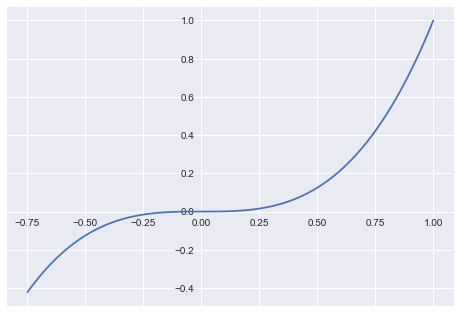

In [42]:
fig, ax = plt.subplots()

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0)) # set position of x spine to x=0

ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))   # set position of y spine to y=0

xx = np.linspace(-0.75, 1., 100)
ax.plot(xx, xx**3)

fig.savefig('images/07 xy0.png',dpi=200)

### other 2D

In [43]:
n = np.array([0,1,2,3,4,5])

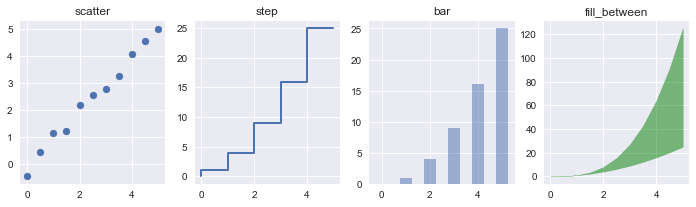

In [44]:
fig, axes = plt.subplots(1, 4, figsize=(12,3))

axes[0].scatter(x, x + 0.25*np.random.randn(len(x)))
axes[0].set_title("scatter")

axes[1].step(n, n**2, lw=2)
axes[1].set_title("step")

axes[2].bar(n, n**2, align="center", width=0.5, alpha=0.5)
axes[2].set_title("bar")

axes[3].fill_between(x, x**2, x**3, color="green", alpha=0.5);
axes[3].set_title("fill_between");

fig.savefig('images/08 other2D.png',dpi=200)

# Text annotation

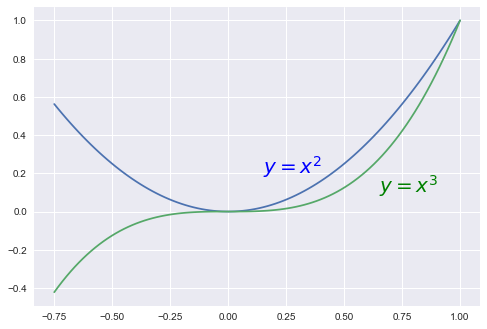

In [45]:
fig, ax = plt.subplots()

ax.plot(xx, xx**2, xx, xx**3)

ax.text(0.15, 0.2, r"$y=x^2$", fontsize=20, color="blue")
ax.text(0.65, 0.1, r"$y=x^3$", fontsize=20, color="green");

fig.savefig('images/09 text_annotation.png',dpi=200)

# subplot2grid

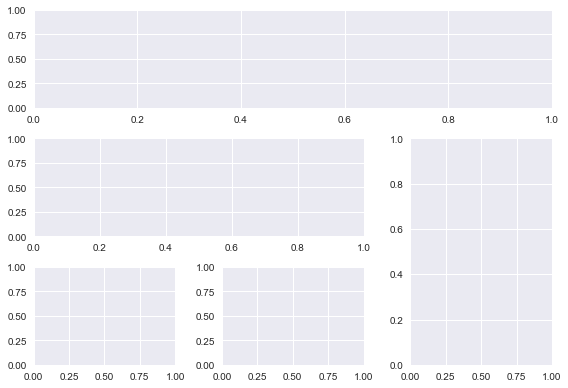

In [46]:
fig = plt.figure()
ax1 = plt.subplot2grid((3,3), (0,0), colspan=3)
ax2 = plt.subplot2grid((3,3), (1,0), colspan=2)
ax3 = plt.subplot2grid((3,3), (1,2), rowspan=2)
ax4 = plt.subplot2grid((3,3), (2,0))
ax5 = plt.subplot2grid((3,3), (2,1))
fig.tight_layout()

fig.savefig('images/10 subplot2grid.png',dpi=200)

## Adding Axes

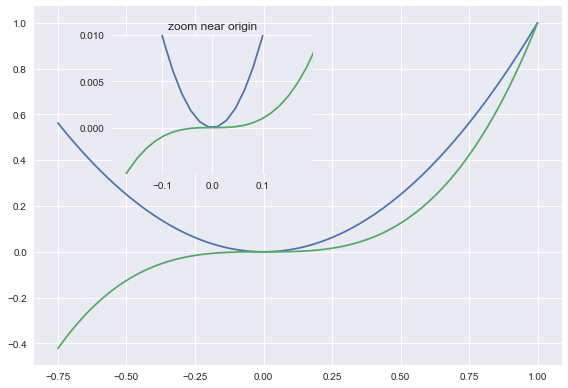

In [47]:
fig, ax = plt.subplots()

ax.plot(xx, xx**2, xx, xx**3)
fig.tight_layout()

# inset
inset_ax = fig.add_axes([0.2, 0.55, 0.35, 0.35]) # X, Y, width, height

inset_ax.plot(xx, xx**2, xx, xx**3)
inset_ax.set_title('zoom near origin')

# set axis range
inset_ax.set_xlim(-.2, .2)
inset_ax.set_ylim(-.005, .01)

# set axis tick locations
inset_ax.set_yticks([0, 0.005, 0.01])
inset_ax.set_xticks([-0.1,0,.1]);

## Colormaps and Contours

Colormaps and contour figures are useful for plotting functions of two variables. In most of these functions we will use a colormap to encode one dimension of the data. 

There are a number of predefined colormaps. It is relatively straightforward to define custom colormaps. 
_List of pre-defined colormaps_: http://www.scipy.org/Cookbook/Matplotlib/Show_colormaps

In [3]:
alpha = 0.7
phi_ext = 2 * np.pi * 0.5

def flux_qubit_potential(phi_m, phi_p):
    return 2 + alpha - 2 * np.cos(phi_p) * np.cos(phi_m) - alpha * np.cos(phi_ext - 2*phi_p)

phi_m = np.linspace(0, 2*np.pi, 100)
phi_p = np.linspace(0, 2*np.pi, 100)
X,Y = np.meshgrid(phi_p, phi_m)
Z = flux_qubit_potential(X, Y).T

### pcolor

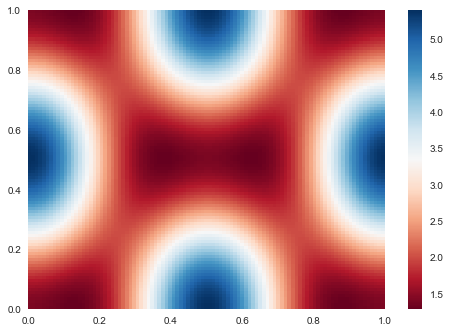

In [4]:
import matplotlib
fig, ax = plt.subplots()

p = ax.pcolor(X/(2*np.pi), Y/(2*np.pi), Z, cmap=matplotlib.cm.RdBu, vmin=abs(Z).min(), vmax=abs(Z).max())
cb = fig.colorbar(p, ax=ax)

fig.savefig('images/11 pcolor.png',dpi=200)

## imshow

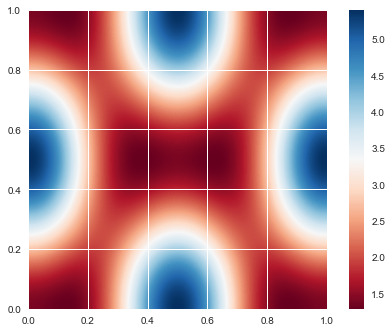

In [5]:
fig, ax = plt.subplots()

im = ax.imshow(Z, cmap=matplotlib.cm.RdBu, vmin=abs(Z).min(), vmax=abs(Z).max(), extent=[0, 1, 0, 1])
im.set_interpolation('bilinear')

cb = fig.colorbar(im, ax=ax)

fig.savefig('images/12 imshow.png',dpi=200)

## Contour

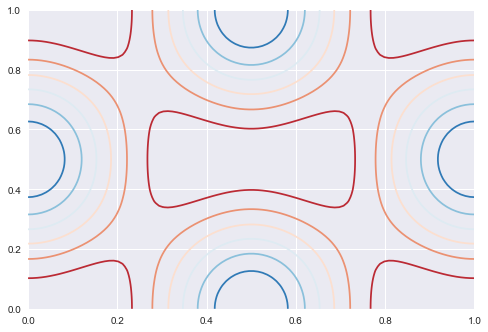

In [6]:
fig, ax = plt.subplots()

cnt = ax.contour(Z, cmap=matplotlib.cm.RdBu, vmin=abs(Z).min(), vmax=abs(Z).max(), extent=[0, 1, 0, 1])
fig.savefig('images/13 contour.png',dpi=200)

## 3D figures

In [7]:
from mpl_toolkits.mplot3d.axes3d import Axes3D

### Surface plots

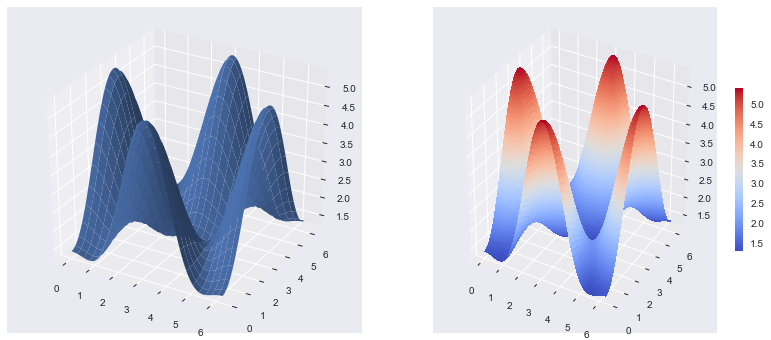

In [8]:
fig = plt.figure(figsize=(14,6))

# `ax` is a 3D-aware axis instance because of the projection='3d' keyword argument to add_subplot
ax = fig.add_subplot(1, 2, 1, projection='3d')

p = ax.plot_surface(X, Y, Z, rstride=4, cstride=4, linewidth=0)

# surface_plot with color grading and color bar
ax = fig.add_subplot(1, 2, 2, projection='3d')
p = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=matplotlib.cm.coolwarm, linewidth=0, antialiased=False)
cb = fig.colorbar(p, shrink=0.5)

fig.savefig('images/14 surface_plot.png',dpi=200)

### Wireframe plots

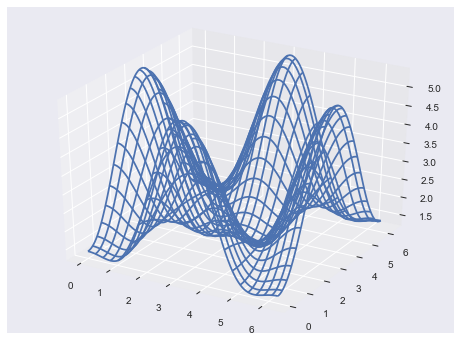

In [9]:
fig = plt.figure(figsize=(8,6))

ax = fig.add_subplot(1, 1, 1, projection='3d')

p = ax.plot_wireframe(X, Y, Z, rstride=4, cstride=4)

fig.savefig('images/15 wireframe.png',dpi=200)

### Contour plots with projection

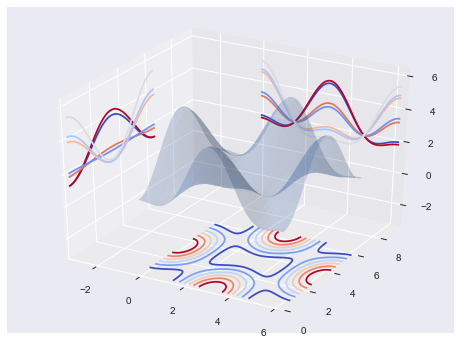

In [10]:
fig = plt.figure(figsize=(8,6))

ax = fig.add_subplot(1,1,1, projection='3d')

ax.plot_surface(X, Y, Z, rstride=4, cstride=4, alpha=0.25)
cset = ax.contour(X, Y, Z, zdir='z', offset=-np.pi, cmap=matplotlib.cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir='x', offset=-np.pi, cmap=matplotlib.cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir='y', offset=3*np.pi, cmap=matplotlib.cm.coolwarm)

ax.set_xlim3d(-np.pi, 2*np.pi);
ax.set_ylim3d(0, 3*np.pi);
ax.set_zlim3d(-np.pi, 2*np.pi);

fig.savefig('images/16 contour_proj.png',dpi=250)